In [1]:
import numpy as np
import pandas as pd

from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from load_datasets import dataset_info, load_diabetes, load_breast_cancer, load_svmguide1
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic_epochs, diagnostic_time
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_10456\3261268271.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Diabetes

In [2]:
data_diab = load_diabetes()

dataset_info(data_diab)


        X_train = (614, 9), y_train = (614,)
        X_test = (154, 9), y_test = (154,)
        Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}


In [3]:
CDiab = 1
MDiab = 8
kDiab = 200

## Benchmark

In [4]:
benchDiab1 = LogisticRegression("L-BFGS", C=CDiab).fit(dataset=data_diab)
benchDiab2 = LogisticRegression("Newton-CG", C=CDiab).fit(dataset=data_diab)
benchDiab3 = LogisticRegression("CG", C=CDiab).fit(dataset=data_diab)

benchDiab_data = optim_bench([benchDiab1, benchDiab2, benchDiab3])

## SGD

In [5]:
# SGD-Fixed
sgdDiab_fixed1 = LogisticRegression("SGD-Fixed", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.2)
sgdDiab_fixed2 = LogisticRegression("SGD-Fixed", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.01)
sgdDiab_fixed3 = LogisticRegression("SGD-Fixed", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.001)

In [6]:
# SGD-Decreasing
sgdDiab_decre1 = LogisticRegression("SGD-Decreasing", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=1)
sgdDiab_decre2 = LogisticRegression("SGD-Decreasing", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.1)
sgdDiab_decre3 = LogisticRegression("SGD-Decreasing", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.01)

In [7]:
# SGDM
sgdmDiab1 = LogisticRegression("SGDM", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=1, momentum=0.9)
sgdmDiab2 = LogisticRegression("SGDM", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.1, momentum=0.9)
sgdmDiab3 = LogisticRegression("SGDM", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.01, momentum=0.9)

In [8]:
# SGD-Armijo
sgdDiab_armijo1 = LogisticRegression("SGD-Armijo", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=1)
sgdDiab_armijo2 = LogisticRegression("SGD-Armijo", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.1)
sgdDiab_armijo3 = LogisticRegression("SGD-Armijo", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.01)

In [9]:
# MSL-SGDM-C
mslcDiab1 = LogisticRegression("MSL-SGDM-C", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=1, momentum=0.9)
mslcDiab2 = LogisticRegression("MSL-SGDM-C", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.1, momentum=0.9)
mslcDiab3 = LogisticRegression("MSL-SGDM-C", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrDiab1 = LogisticRegression("MSL-SGDM-R", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=1, momentum=0.9)
mslrDiab2 = LogisticRegression("MSL-SGDM-R", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.1, momentum=0.9)
mslrDiab3 = LogisticRegression("MSL-SGDM-R", C=CDiab).fit(dataset=data_diab, max_epochs=kDiab, batch_size=MDiab, step_size=0.01, momentum=0.9)

In [11]:
modelsDiab_data = optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdmDiab1, sgdmDiab2, sgdmDiab3,
                              sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3, mslcDiab1, mslcDiab2, mslcDiab3, mslrDiab1, mslrDiab2, mslrDiab3])

## Summary

In [12]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.000000,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.000000,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.000000,0.193861
7,SGD-Decreasing,1,8.0,0.100,0.0,0.662128,0.000142,0.562498,200,0.653094,0.642857,0.000200,0.193965
13,SGD-Armijo,1,8.0,0.100,0.0,0.662128,0.000178,3.623715,200,0.653094,0.642857,0.000173,0.193880
5,SGD-Fixed,1,8.0,0.001,0.0,0.662128,0.000204,0.555067,200,0.653094,0.642857,0.000200,0.193976
14,SGD-Armijo,1,8.0,0.010,0.0,0.662128,0.000461,3.591091,200,0.653094,0.642857,0.000520,0.193871
18,MSL-SGDM-R,1,8.0,1.000,0.9,0.662129,0.001300,3.742923,200,0.653094,0.642857,0.001237,0.193450
12,SGD-Armijo,1,8.0,1.000,0.0,0.662129,0.001379,3.657883,200,0.653094,0.642857,0.001300,0.193861
11,SGDM,1,8.0,0.010,0.9,0.662129,0.001785,0.537184,200,0.653094,0.642857,0.001034,0.193073


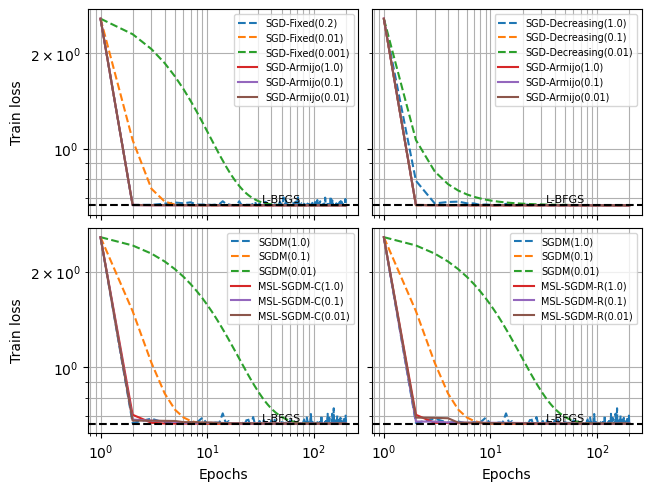

In [13]:
diagnostic_epochs(optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
           optim_data([sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
           optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslcDiab1, mslcDiab2, mslcDiab3]),
           optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslrDiab1, mslrDiab2, mslrDiab3]),
           benchDiab1)

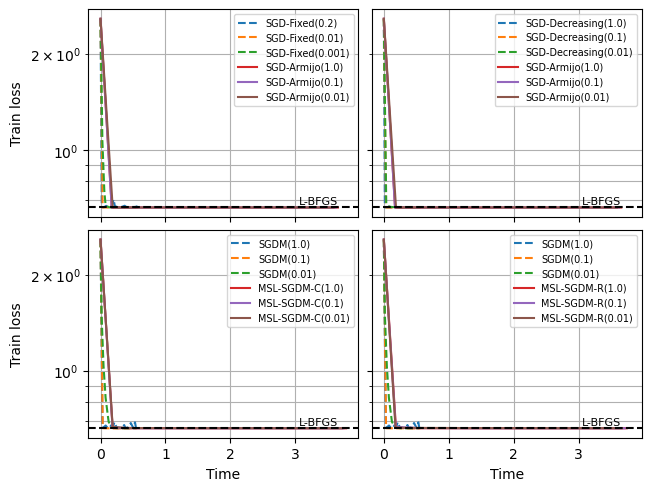

In [14]:
diagnostic_time(
    optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_fixed3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
    optim_data([sgdDiab_decre1, sgdDiab_decre2, sgdDiab_decre3, sgdDiab_armijo1, sgdDiab_armijo2, sgdDiab_armijo3]),
    optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslcDiab1, mslcDiab2, mslcDiab3]),
    optim_data([sgdmDiab1, sgdmDiab2, sgdmDiab3, mslrDiab1, mslrDiab2, mslrDiab3]),
    benchDiab1)

# Breast cancer

In [3]:
data_breast = load_breast_cancer()

dataset_info(data_breast)


Diabetes dataset
X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}


In [4]:
CBreast = 1
MBreast = 8
kBreast = 200

## Benchmark

In [5]:
benchBreast1 = LogisticRegression("L-BFGS", C=CBreast).fit(dataset=data_breast)
benchBreast2 = LogisticRegression("Newton-CG", C=CBreast).fit(dataset=data_breast)
benchBreast3 = LogisticRegression("CG", C=CBreast).fit(dataset=data_breast)

benchBreast_data = optim_bench([benchBreast1, benchBreast2, benchBreast3])

## SGD

In [6]:
# SGD-Fixed
sgdBreast_fixed1 = LogisticRegression("SGD-Fixed", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.5)
sgdBreast_fixed2 = LogisticRegression("SGD-Fixed", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.1)
sgdBreast_fixed3 = LogisticRegression("SGD-Fixed", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.01)

In [7]:
# SGD-Decreasing
sgdBreast_decre1 = LogisticRegression("SGD-Decreasing", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=1)
sgdBreast_decre2 = LogisticRegression("SGD-Decreasing", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.1)
sgdBreast_decre3 = LogisticRegression("SGD-Decreasing", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.05)

In [8]:
# SGDM
sgdmBreast_1 = LogisticRegression("SGDM", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.5, momentum=0.9)
sgdmBreast_2 = LogisticRegression("SGDM", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.1, momentum=0.9)
sgdmBreast_3 = LogisticRegression("SGDM", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.01, momentum=0.9)

In [9]:
# SGD-Armijo
sgdBreast_armijo1 = LogisticRegression("SGD-Armijo", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=1)
sgdBreast_armijo2 = LogisticRegression("SGD-Armijo", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.5)
sgdBreast_armijo3 = LogisticRegression("SGD-Armijo", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.05)

In [10]:
# MSL-SGDM-C
mslcBreast_1 = LogisticRegression("MSL-SGDM-C", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression("MSL-SGDM-C", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.5, momentum=0.9)
mslcBreast_3 = LogisticRegression("MSL-SGDM-C", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.05, momentum=0.9)

In [11]:
# MSL-SGDM-R
mslrBreast_1 = LogisticRegression("MSL-SGDM-R", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression("MSL-SGDM-R", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.5, momentum=0.9)
mslrBreast_3 = LogisticRegression("MSL-SGDM-R", C=CBreast).fit(dataset=data_breast, batch_size=MBreast, max_epochs=kBreast, step_size=0.05, momentum=0.9)

In [12]:
modelsBreast_data = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdmBreast_1, sgdmBreast_2, sgdmBreast_3,
                                sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3, mslcBreast_1, mslcBreast_2, mslcBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3])

## Summary

In [13]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.000000,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.000000,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.000000,0.447463
8,SGD-Decreasing,1,8.0,0.05,0.0,0.492561,5.111323e-05,0.526567,200,0.902930,0.817518,0.000000,0.447463
7,SGD-Decreasing,1,8.0,0.10,0.0,0.492561,1.923749e-04,0.534764,200,0.902930,0.817518,0.000173,0.447564
12,SGD-Armijo,1,8.0,1.00,0.0,0.492562,1.504207e-03,3.161134,200,0.902930,0.817518,0.001446,0.447707
14,SGD-Armijo,1,8.0,0.05,0.0,0.492562,1.477416e-03,3.130280,200,0.902930,0.817518,0.001510,0.447512
11,SGDM,1,8.0,0.01,0.9,0.492562,1.906914e-03,0.521980,200,0.902930,0.817518,0.001852,0.447558
13,SGD-Armijo,1,8.0,0.50,0.0,0.492562,1.967403e-03,3.149429,200,0.902930,0.817518,0.002015,0.447636
18,MSL-SGDM-R,1,8.0,1.00,0.9,0.492565,3.153037e-03,3.236493,200,0.902930,0.817518,0.003191,0.447275


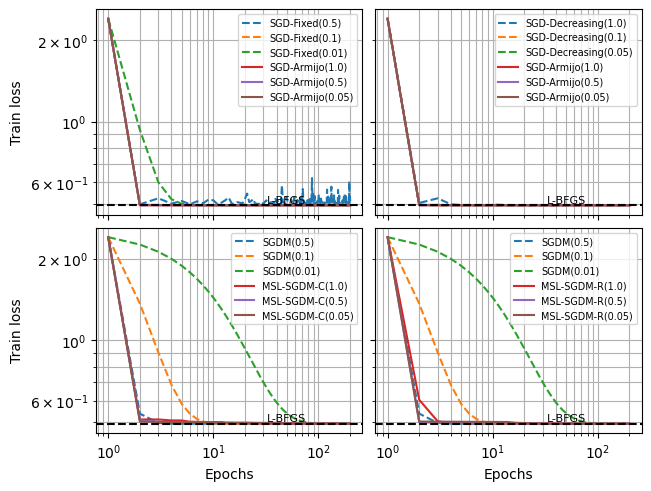

In [14]:
diagnostic_epochs(optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslcBreast_1, mslcBreast_2, mslcBreast_3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3]),
           benchBreast1)

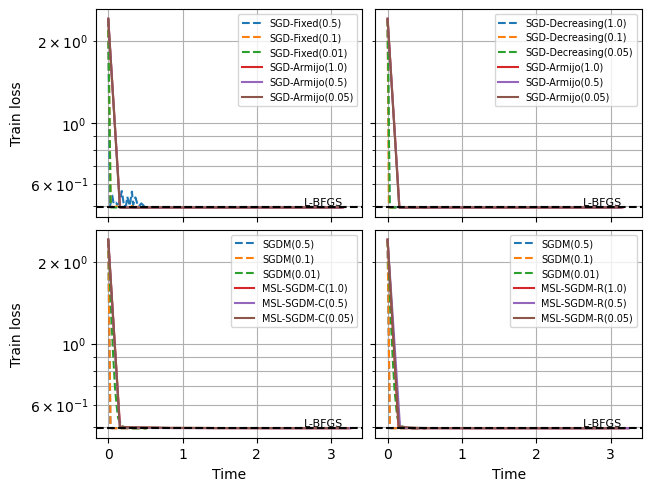

In [15]:
diagnostic_time(optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_fixed3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdBreast_decre1, sgdBreast_decre2, sgdBreast_decre3, sgdBreast_armijo1, sgdBreast_armijo2, sgdBreast_armijo3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslcBreast_1, mslcBreast_2, mslcBreast_3]),
           optim_data([sgdmBreast_1, sgdmBreast_2, sgdmBreast_3, mslrBreast_1, mslrBreast_2, mslrBreast_3]),
           benchBreast1)

# svmguide1

In [3]:
data_svm = load_svmguide1()

dataset_info(data_svm)


        X_train = (3089, 5), y_train = (3089,)
        X_test = (4000, 5), y_test = (4000,)
        Class distribution: {-1: 0.3525412754936873, 1: 0.6474587245063127}


In [4]:
Csvm = 1
Msvm = 16
ksvm = 200

## Benchmark

In [16]:
benchSvm1 = LogisticRegression("L-BFGS", C=Csvm).fit(dataset=data_svm)
benchSvm2 = LogisticRegression("Newton-CG", C=Csvm).fit(dataset=data_svm)
benchSvm3 = LogisticRegression("CG", C=Csvm).fit(dataset=data_svm)

benchSvm_data = optim_bench([benchSvm1, benchSvm2, benchSvm3])

## SGD

In [7]:
# SGD-Fixed
sgdSvm_fixed1 = LogisticRegression("SGD-Fixed", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=1)
sgdSvm_fixed2 = LogisticRegression("SGD-Fixed", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.1)
sgdSvm_fixed3 = LogisticRegression("SGD-Fixed", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.01)

In [8]:
# SGD-Decreasing
sgdSvm_decre1 = LogisticRegression("SGD-Decreasing", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=1)
sgdSvm_decre2 = LogisticRegression("SGD-Decreasing", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.1)
sgdSvm_decre3 = LogisticRegression("SGD-Decreasing", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.01)

In [9]:
# SGDM
sgdmSvm1 = LogisticRegression("SGDM", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=1, momentum=0.9)
sgdmSvm2 = LogisticRegression("SGDM", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.1, momentum=0.9)
sgdmSvm3 = LogisticRegression("SGDM", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.01, momentum=0.9)

In [10]:
# SGD-Armijo
sgdSvm_armijo1 = LogisticRegression("SGD-Armijo", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=1)
sgdSvm_armijo2 = LogisticRegression("SGD-Armijo", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.1)
sgdSvm_armijo3 = LogisticRegression("SGD-Armijo", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.01)

In [11]:
# MSL-SGDM-C
mslcSvm1 = LogisticRegression("MSL-SGDM-C", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=1, momentum=0.9)
mslcSvm2 = LogisticRegression("MSL-SGDM-C", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.1, momentum=0.9)
mslcSvm3 = LogisticRegression("MSL-SGDM-C", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.01, momentum=0.9)

In [12]:
# MSL-SGDM-R
mslrSvm1 = LogisticRegression("MSL-SGDM-R", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=1, momentum=0.9)
mslrSvm2 = LogisticRegression("MSL-SGDM-R", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.1, momentum=0.9)
mslrSvm3 = LogisticRegression("MSL-SGDM-R", C=Csvm).fit(dataset=data_svm, max_epochs=ksvm, batch_size=Msvm, step_size=0.01, momentum=0.9)

In [14]:
modelsSvm_data = optim_data([sgdSvm_fixed1, sgdSvm_fixed2, sgdSvm_fixed3, sgdSvm_decre1, sgdSvm_decre2, sgdSvm_decre3, sgdmSvm1, sgdmSvm2, sgdmSvm3,
                              sgdSvm_armijo1, sgdSvm_armijo2, sgdSvm_armijo3, mslcSvm1, mslcSvm2, mslcSvm3, mslrSvm1, mslrSvm2, mslrSvm3])

## Summary

In [15]:
models_summary(modelsSvm_data, benchSvm_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.000000,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.000000,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.000000,0.181772
8,SGD-Decreasing,1,16.0,0.01,0.0,0.673302,1.392248e-05,1.651460,200,0.653933,0.51675,0.000000,0.181772
14,SGD-Armijo,1,16.0,0.01,0.0,0.673302,2.125814e-05,25.416486,200,0.653933,0.51675,0.000100,0.181846
7,SGD-Decreasing,1,16.0,0.10,0.0,0.673302,6.433245e-05,1.651892,200,0.653933,0.51675,0.000000,0.181772
13,SGD-Armijo,1,16.0,0.10,0.0,0.673302,1.009360e-04,25.566054,200,0.653933,0.51675,0.000173,0.181772
11,SGDM,1,16.0,0.01,0.9,0.673302,2.397646e-04,1.613769,200,0.653933,0.51700,0.000245,0.181916
19,MSL-SGDM-R,1,16.0,0.10,0.9,0.673303,8.370016e-04,25.519984,200,0.653933,0.51600,0.000843,0.181728
12,SGD-Armijo,1,16.0,1.00,0.0,0.673303,9.361447e-04,25.697039,200,0.653933,0.51700,0.000954,0.181742


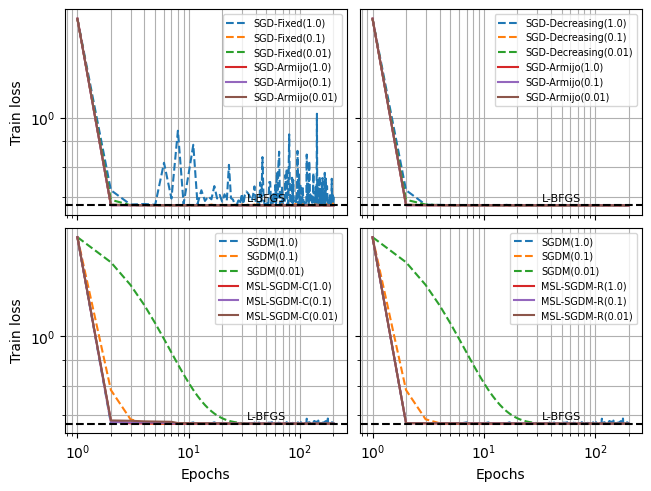

In [17]:
diagnostic_epochs(optim_data([sgdSvm_fixed1, sgdSvm_fixed2, sgdSvm_fixed3, sgdSvm_armijo1, sgdSvm_armijo2, sgdSvm_armijo3]),
                  optim_data([sgdSvm_decre1, sgdSvm_decre2, sgdSvm_decre3, sgdSvm_armijo1, sgdSvm_armijo2, sgdSvm_armijo3]),
                  optim_data([sgdmSvm1, sgdmSvm2, sgdmSvm3, mslcSvm1, mslcSvm2, mslcSvm3]),
                  optim_data([sgdmSvm1, sgdmSvm2, sgdmSvm3, mslrSvm1, mslrSvm2, mslrSvm3]),
                  benchSvm1)

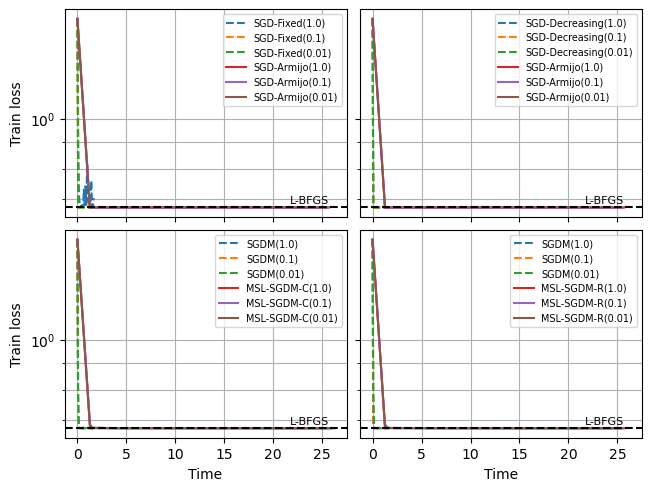

In [18]:
diagnostic_time(optim_data([sgdSvm_fixed1, sgdSvm_fixed2, sgdSvm_fixed3, sgdSvm_armijo1, sgdSvm_armijo2, sgdSvm_armijo3]),
                optim_data([sgdSvm_decre1, sgdSvm_decre2, sgdSvm_decre3, sgdSvm_armijo1, sgdSvm_armijo2, sgdSvm_armijo3]),
                optim_data([sgdmSvm1, sgdmSvm2, sgdmSvm3, mslcSvm1, mslcSvm2, mslcSvm3]),
                optim_data([sgdmSvm1, sgdmSvm2, sgdmSvm3, mslrSvm1, mslrSvm2, mslrSvm3]),
                benchSvm1)